In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [6]:
df = pd.read_csv('dataset/synthetic_fraud_dataset.csv')

df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [8]:
selected_columns = [
    'Transaction_Amount',
    'Transaction_Type',
    'Account_Balance',
    'Device_Type',
    'Location',
    'Merchant_Category',
    'IP_Address_Flag',
    'Previous_Fraudulent_Activity',
    'Daily_Transaction_Count',
    'Avg_Transaction_Amount_7d',
    'Failed_Transaction_Count_7d',
    'Card_Type',
    'Card_Age',
    'Transaction_Distance',
    'Authentication_Method',
    'Risk_Score',
    'Is_Weekend',
    'Fraud_Label'  
]

df = df[selected_columns]

df.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,POS,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,31.28,POS,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [9]:
df.isnull().sum()

Transaction_Amount              0
Transaction_Type                0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

In [10]:
df.dtypes

Transaction_Amount              float64
Transaction_Type                 object
Account_Balance                 float64
Device_Type                      object
Location                         object
Merchant_Category                object
IP_Address_Flag                   int64
Previous_Fraudulent_Activity      int64
Daily_Transaction_Count           int64
Avg_Transaction_Amount_7d       float64
Failed_Transaction_Count_7d       int64
Card_Type                        object
Card_Age                          int64
Transaction_Distance            float64
Authentication_Method            object
Risk_Score                      float64
Is_Weekend                        int64
Fraud_Label                       int64
dtype: object

In [11]:
le = LabelEncoder()


for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


df.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,3,93213.17,0,3,4,0,0,7,437.63,3,0,65,883.17,0,0.8494,0,0
1,1.19,1,75725.25,1,2,0,0,0,13,478.76,4,2,186,2203.36,3,0.0959,0,1
2,28.96,2,1588.96,2,1,3,0,0,14,50.01,4,3,226,1909.29,0,0.8400,0,1
3,254.32,0,76807.20,2,2,0,0,0,8,182.48,4,3,76,1311.86,1,0.7935,0,1
4,31.28,3,92354.66,1,1,1,0,1,14,328.69,4,2,140,966.98,3,0.3819,1,1


In [12]:

# Separate features (X) and target (y)
X = df.drop('Fraud_Label', axis=1)
y = df['Fraud_Label']

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the splits
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (40000, 17) (40000,)
Testing set: (10000, 17) (10000,)


In [13]:
# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Store classification reports
reports = {}

# Train, predict, store and print report
for name, model in models.items():
    print(f"\n====== {name} ======")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print report
    report_text = classification_report(y_test, y_pred)
    print(report_text)
    
    # Store report as dict
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    reports[name] = report_dict


====== Decision Tree ======
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6787
           1       1.00      1.00      1.00      3213

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000


====== KNN ======
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      6787
           1       0.33      0.19      0.24      3213

    accuracy                           0.61     10000
   macro avg       0.51      0.50      0.49     10000
weighted avg       0.57      0.61      0.58     10000


====== Naive Bayes ======
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6787
           1       1.00      0.62      0.76      3213

    accuracy                           0.88     10000
   macro avg       0.92      0.81      0.84     10000

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


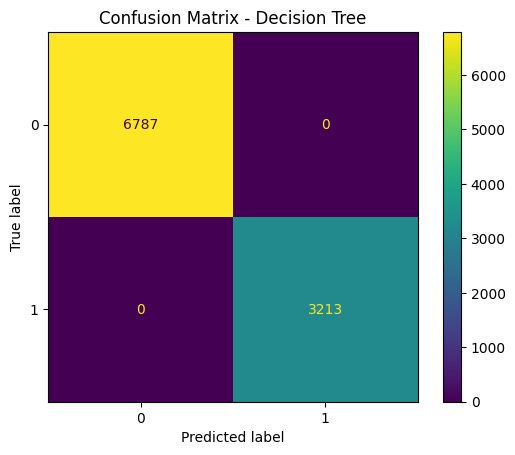

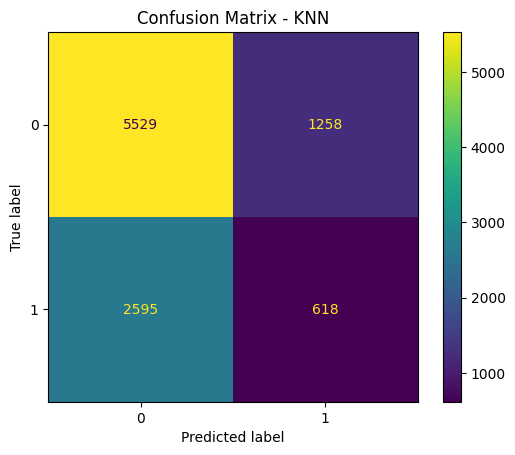

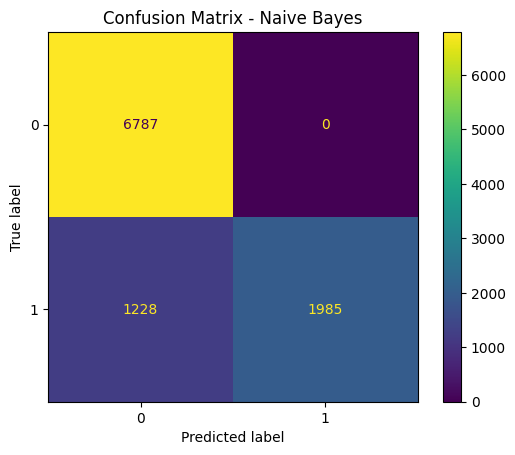

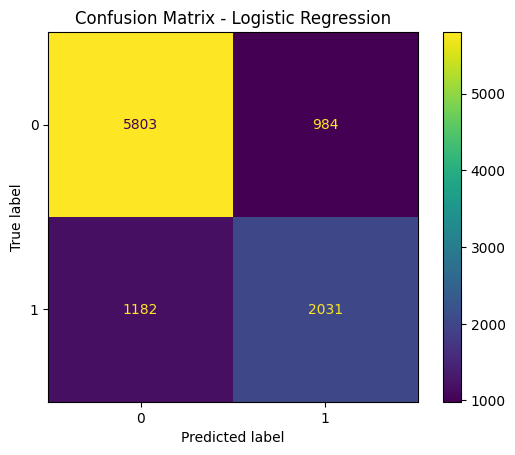

In [14]:
# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [15]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_balanced, y_train_balanced,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

# Predict on the test set
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Store classification report in a variable
dl_classification_report = classification_report(y_test, y_pred, output_dict=False)
print("====== Sequential Model (Scaled + SMOTE) ======")
print(dl_classification_report)

Epoch 1/20


C:\Users\Jan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


679/679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8081 - loss: 0.3858 - val_accuracy: 0.9952 - val_loss: 0.0427
Epoch 2/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 0.9645 - loss: 0.0877 - val_accuracy: 0.9908 - val_loss: 0.0408
Epoch 3/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.9790 - loss: 0.0537 - val_accuracy: 0.9916 - val_loss: 0.0299
Epoch 4/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.9836 - loss: 0.0411 - val_accuracy: 0.9926 - val_loss: 0.0250
Epoch 5/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.9890 - loss: 0.0281 - val_accuracy: 0.9935 - val_loss: 0.0217
Epoch 6/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.9899 - loss: 0.0250 - val_accuracy: 0.9922 - val_loss: 0.0247
Epoch 7/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.9919 - loss: 0.0200 - val_accuracy: 0.9934 - val_loss: 0.0207
Epoch 8/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - accuracy: 0.9925 - loss: 0.0205 - val_accuracy:

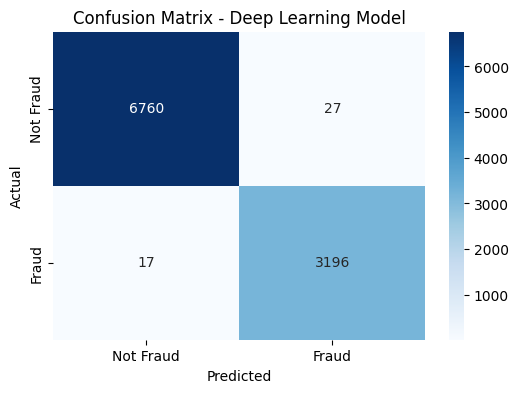

In [16]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Deep Learning Model')
plt.show()